In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Con esto eliminamos los avisos de "deprecated"
import warnings
warnings.filterwarnings("ignore")

### Se procede a cargar los datos y limpiarlos.

In [2]:
data = pd.read_csv("../Modelar_RedNeuronal/Dataset/SabData_03_09_2019.csv", sep = ";")

In [3]:
data.head()

,TheTime,u903_RadIntGlob,u901_RadGlobal,u903_RadIntPar,u901_RadPar,u903_HRint,u901_HumExt,u905_ODT1,u905_ODT2,u905_ODT3,...,u904_EvAbrirCosRW1,u904_EvAbrirCosRW2,u904_EvAbrirCosRW3,u904_EvCerrarCosRW1,u904_EvCerrarCosRW2,u904_EvCerrarCosRW3,u904_pruebaCaudalimetro,u905_TintSemillero,u901_CaudalCO2,u902_NivelRW4mm
0,1567468801,9.0704,52.778,0.75661,12.28,66.6,99.93,-99.99533,-100.0451,-99.98288,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.70899,-0.152810,12.50023
1,1567468802,9.0704,52.778,0.75661,12.28,66.6,99.93,-99.99533,-100.0451,-99.98288,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.70899,-0.152810,12.50936
2,1567468803,9.0704,NaN,0.75661,NaN,66.6,NaN,-99.99533,-100.0451,-99.98288,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.70899,NaN,12.50286
3,1567468804,9.0704,-23.878,0.75661,274.25,66.6,99.95,-99.99533,-100.0451,-99.98288,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.70899,0.005741,12.50619
4,1567468805,9.0704,-23.878,0.75661,274.25,66.6,99.95,-99.99533,-100.0451,-99.98288,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.70899,0.005741,12.49295


## Se cargan los valores deseados y se grafican. Se eliminan los NaN si los hay y se grafican encima de lo anterior para ver si no se ha distorsionado 

TheTime              0
u901_RadGlobal    8427
u902_pHRW4        8377
u902_ODRW4        8377
dtype: int64 (85161, 4)
TheTime           0
u901_RadGlobal    0
u902_pHRW4        0
u902_ODRW4        0
dtype: int64 (68375, 4)


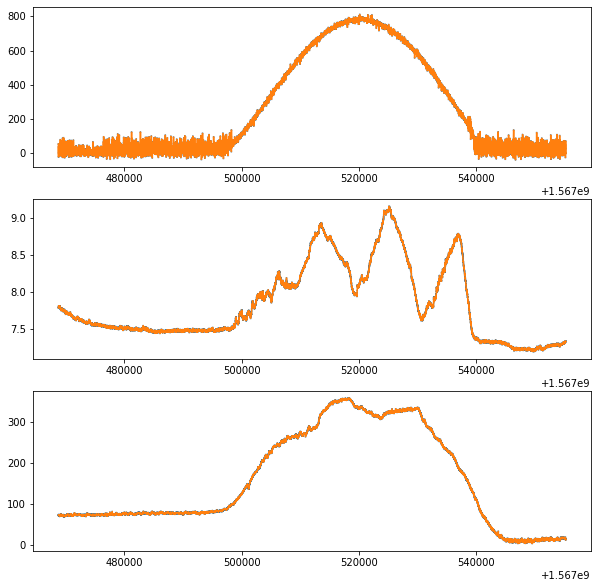

In [4]:
columns = ["TheTime","u901_RadGlobal","u902_pHRW4","u902_ODRW4"]
values = data[columns]
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.plot(values["TheTime"],values["u901_RadGlobal"])
plt.subplot(3,1,2)
plt.plot(values["TheTime"],values["u902_pHRW4"])
plt.subplot(3,1,3)
plt.plot(values["TheTime"],values["u902_ODRW4"])

print(np.isnan(values).sum(),values.shape)
values.dropna(inplace=True)
print(np.isnan(values).sum(),values.shape)

plt.subplot(3,1,1)
plt.plot(values["TheTime"],values["u901_RadGlobal"])
plt.subplot(3,1,2)
plt.plot(values["TheTime"],values["u902_pHRW4"])
plt.subplot(3,1,3)
plt.plot(values["TheTime"],values["u902_ODRW4"])

## Se grafican los datos entrada/salida para crear el modelo 

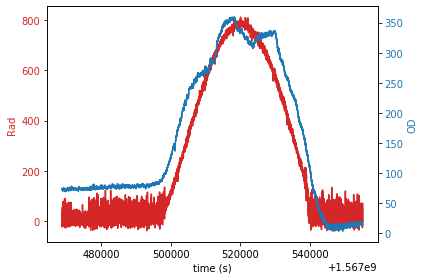

In [5]:
#Se cargan los datos
t = values["TheTime"]
Rad = values["u901_RadGlobal"]
pH = values["u902_pHRW4"]
OD = values["u902_ODRW4"]

#Se grafican.
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Rad', color=color)
ax1.plot(t, Rad, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('OD', color=color)  # we already handled the x-label with ax1
ax2.plot(t, OD, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Se comienza a crear la Red Neuronal

In [11]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense


In [17]:
training_data = np.array(Rad, "float32")
target_data = np.array(OD, "float32")
model = Sequential()
model.add(Dense(20, activation="tanh", input_dim=1, kernel_initializer="uniform"))
model.add(Dense(1, activation="linear", kernel_initializer="uniform"))

# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(training_data, target_data, epochs=100, batch_size=10,  verbose=2)

Epoch 1/100
 - 24s - loss: 23897.6297 - acc: 0.0000e+00
Epoch 2/100
 - 25s - loss: 7096.5336 - acc: 0.0000e+00
Epoch 3/100
 - 25s - loss: 1507.4282 - acc: 0.0000e+00
Epoch 4/100
 - 25s - loss: 740.9689 - acc: 0.0000e+00
Epoch 5/100
 - 25s - loss: 696.1175 - acc: 0.0000e+00
Epoch 6/100
 - 25s - loss: 722.0180 - acc: 0.0000e+00
Epoch 7/100
 - 24s - loss: 669.8359 - acc: 0.0000e+00
Epoch 8/100
 - 23s - loss: 645.9997 - acc: 0.0000e+00
Epoch 9/100
 - 23s - loss: 678.8044 - acc: 0.0000e+00
Epoch 10/100
 - 24s - loss: 648.2290 - acc: 0.0000e+00
Epoch 11/100
 - 23s - loss: 701.8866 - acc: 0.0000e+00
Epoch 12/100
 - 24s - loss: 641.7779 - acc: 0.0000e+00
Epoch 13/100
 - 23s - loss: 642.8216 - acc: 0.0000e+00
Epoch 14/100
 - 23s - loss: 638.9752 - acc: 0.0000e+00
Epoch 15/100
 - 23s - loss: 636.9807 - acc: 0.0000e+00
Epoch 16/100
 - 23s - loss: 637.1186 - acc: 0.0000e+00
Epoch 17/100
 - 23s - loss: 631.6878 - acc: 0.0000e+00
Epoch 18/100
 - 23s - loss: 638.0536 - acc: 0.0000e+00
Epoch 19/100
 -